## Example 9.10: Comparing Weight Variation in Mice

An experiemter wants to compare the metabolic rates of white mice subjected to different drugs. The weights of the mice may affect their metabolic rates ; thus, the experimenter wishes to obtain mice that are relatively homogeneous with respect to weight. Currently 13 mice from supplier 1 and 18 mice from supplier 2 are available for comparison. Do these data provide sufficient evidence to indicate a difference in the variability of weights of mice obtained from the two suppliers. Use α = 0.1. 

1. What is the null hypothesis and the  is the alternative hypothesis?
 

$H_0 : \sigma_1^2 / \sigma_2^2 = 1 $ 

$H_a : \sigma_1^2 / \sigma_2^2 \neq 1 $

It is a two-tailed test. 

2. Let's load the data and calculate the sample variance.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
%matplotlib inline
plt.close('all')
df = pd.read_csv('MICEWTS.CSV')
# We make a new dataframe with selecting the row that are NEW in the column METHODS and the column SCORE.
df1 = df.loc [df['SUPPLIER'] ==1, ['WEIGHT']]
df2 = df.loc [df['SUPPLIER'] ==2, ['WEIGHT']]

print(df)

print(df1)
print(df2)

    SUPPLIER  WEIGHT
0          1    4.23
1          1    4.35
2          1    4.05
3          1    3.75
4          1    4.41
5          1    4.37
6          1    4.01
7          1    4.06
8          1    4.15
9          1    4.19
10         1    4.52
11         1    4.21
12         1    4.29
13         2    4.14
14         2    4.26
15         2    4.05
16         2    4.11
17         2    4.31
18         2    4.12
19         2    4.17
20         2    4.35
21         2    4.25
22         2    4.21
23         2    4.05
24         2    4.28
25         2    4.15
26         2    4.20
27         2    4.32
28         2    4.25
29         2    4.02
30         2    4.14
    WEIGHT
0     4.23
1     4.35
2     4.05
3     3.75
4     4.41
5     4.37
6     4.01
7     4.06
8     4.15
9     4.19
10    4.52
11    4.21
12    4.29
    WEIGHT
13    4.14
14    4.26
15    4.05
16    4.11
17    4.31
18    4.12
19    4.17
20    4.35
21    4.25
22    4.21
23    4.05
24    4.28
25    4.15
26    4.20
27    4.3

In [2]:
xb1 = df1['WEIGHT'].mean()
v1 = df1['WEIGHT'].var(ddof = 1)
n1 = len(df1)



print('sample 1 mean: ',xb1)
print('variance sample 1 (unbiased): ',v1)
print('number of observations in the sample 1: ',n1)


sample 1 mean:  4.19923076923077
variance sample 1 (unbiased):  0.0408576923076923
number of observations in the sample 1:  13


In [3]:
xb2 = df2['WEIGHT'].mean()
v2 = df2['WEIGHT'].var(ddof = 1)
n2 = len(df2)



print('sample 2 mean: ',xb2)
print('variance sample 2 (unbiased): ',v2)
print('number of observations in the sample 2: ',n2)


sample 2 mean:  4.187777777777778
variance sample 2 (unbiased):  0.00964183006535948
number of observations in the sample 2:  18


3. F-distribution for different degrees of freedom.


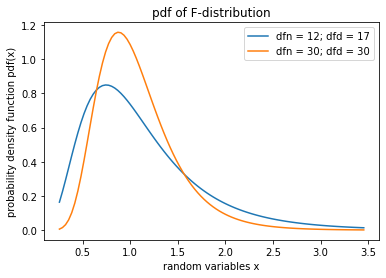

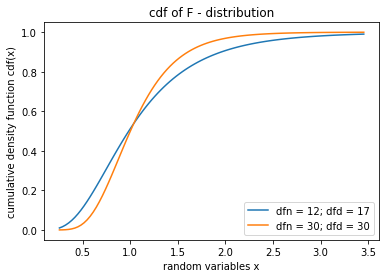

In [4]:
# Frozen random variable distribution
# Illustrate large df 30 versus small df 10
rv1 = sts.f(n1-1,n2-1)
rv2 =  sts.f(30,30)
x = np.linspace(rv1.ppf(0.01),rv1.ppf(0.99), 100)
plt.figure()
plt.plot(x,rv1.pdf(x),label = 'dfn = 12; dfd = 17')
plt.plot(x,rv2.pdf(x),label = 'dfn = 30; dfd = 30')
plt.title('pdf of F-distribution')
plt.xlabel('random variables x')
plt.ylabel('probability density function pdf(x)')

plt.legend()
plt.show()

plt.figure()
plt.plot(x,rv1.cdf(x),label = 'dfn = 12; dfd = 17')
plt.plot(x,rv2.cdf(x),label = 'dfn = 30; dfd = 30')
plt.title('cdf of F - distribution')
plt.xlabel('random variables x')
plt.ylabel('cumulative density function cdf(x)')
plt.legend()
plt.show()




4. What is the rejection region?


In [5]:
alpha = 0.1

ff =  rv1.ppf(1-alpha/2)
print ('F_alpha/2 ',ff) 

F_alpha/2  2.3806541615770063


5. Calculate the F-statistic

The largest variance / smallest variance


In [6]:
F = v1/v2
print('F-statistic: ',F)
print('in rejection region? ',F > ff)

F-statistic:  4.237545365426329
in rejection region?  True


5. Conclusion
We reject the null hypothesis in favor of the alternative hypothesis at an alpha 0,1 level of significance. 

6. Practical conclusion
We select the mice of supplier 2 as the variance of the weight is smaller than the variance of the weight of the mice of supplier 1. 

7. What is the observed significance level?

In [7]:
p = 2*(1-rv1.cdf(F))
print('The observed significance level: ', p)

The observed significance level:  0.007118066549486546


This is clearly smaller than $\alpha = 0.1$, hence we reject $H_0$ in favor for $H_a$.


8. What is the 90% confidence interval for $\sigma_1^2/\sigma_2^2$?

In [8]:
fu = sts.f.ppf(1-alpha/2,n2-1,n1-1)
fl = sts.f.ppf(alpha/2,n2-1,n1-1)
print('90% confidence interval: ',fl*v1/v2,'  ',fu*v1/v2 )

90% confidence interval:  1.7799920012822317    10.94489703524165


Conclusion we can see that 1 is not incorporated in the interval. All values are larger then one. Hence the $\sigma_1^2 >\sigma_2^2$.